In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Ruta al archivo local
file_path = "data/data_limpieza_media.csv"

In [3]:
# Cargar el dataset
df = pd.read_csv(file_path)

In [4]:
# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar el ancho de la salida para evitar cortes
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada columna

# Mostrar el DataFrame completo
df.head()

,Edad,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Puntaje_Credito
0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,7.0,11.27,4.0,809.98,265.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,4.0,11.27,4.0,809.98,266.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,7.0,11.27,4.0,809.98,267.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,4.0,6.27,4.0,809.98,268.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,4.0,11.27,4.0,809.98,269.0,0.0,0.0,1.0,0.0,0.0,0.0,0


### **Clientes sin productos bancarios, analisis**

In [5]:
# Seleccionar solo las columnas deseadas del DataFrame
columnas_deseadas = [
    'Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito',
    'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados',
    'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente',
    'Edad_Historial_Credito', 'Puntaje_Credito'
]

# Crear un DataFrame con las columnas seleccionadas
df_columnas_deseadas = df[columnas_deseadas]

# Mostrar estadísticas descriptivas de las columnas seleccionadas
df_columnas_deseadas.describe()

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,221.220460,1.353460
std,10.764812,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,99.680716,0.764913
min,14.000000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,1.000000,0.000000
25%,24.000000,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,144.000000,1.000000
50%,33.000000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,219.000000,2.000000
75%,42.000000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,302.000000,2.000000
max,56.000000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,404.000000,2.000000


In [6]:
anomalies = df_columnas_deseadas[
    (df_columnas_deseadas['Num_Cuentas_Bancarias'] == 0) & 
    ((df_columnas_deseadas['Num_Tarjetas_Credito'] > 0) | (df_columnas_deseadas['Num_Prestamos'] > 0))
]
anomalies

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
48,33.0,11242.783333,0.0,1.0,8.0,2.0,0.0,3.0,9.34,2.0,352.16,367.0,0
49,34.0,11242.783333,0.0,1.0,8.0,2.0,0.0,2.0,15.34,4.0,352.16,368.0,0
50,34.0,10469.207759,0.0,1.0,8.0,2.0,0.0,3.0,9.34,4.0,352.16,369.0,0
51,34.0,10469.207759,0.0,1.0,8.0,2.0,0.0,2.0,8.34,4.0,352.16,370.0,0
52,34.0,10469.207759,0.0,1.0,8.0,2.0,0.0,4.0,9.34,4.0,352.16,371.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,19.0,3468.315833,0.0,4.0,6.0,1.0,14.0,0.0,5.10,1.0,1079.48,340.0,2
99964,18.0,3468.315833,0.0,4.0,6.0,1.0,14.0,0.0,5.10,1.0,1079.48,341.0,0
99965,19.0,3468.315833,0.0,4.0,6.0,1.0,14.0,0.0,5.10,1.0,1079.48,342.0,0
99966,19.0,3468.315833,0.0,4.0,6.0,1.0,14.0,0.0,5.10,1.0,1079.48,343.0,0


Estos resultados confirman que hay **4,417 clientes sin cuentas bancarias (`Num_Cuentas_Bancarias == 0`)** pero con otros productos financieros, como tarjetas de crédito (`Num_Tarjetas_Credito > 0`) o préstamos (`Num_Prestamos > 0`). Esto es inconsistente con la regla de negocio que establece que **para tener productos financieros es obligatorio tener al menos una cuenta bancaria**.

### **Conclusión:**
Dado que la regla de negocio es clara (**se necesita una cuenta bancaria para tener otros productos**), la opción más segura es **eliminar estos registros**, ya que probablemente sean errores en los datos. 

In [7]:
# Filtrar el dataset para mantener solo las filas con Num_Cuentas_Bancarias > 0
df = df[df['Num_Cuentas_Bancarias'] > 0]

# Reiniciar el índice del DataFrame (opcional, para limpiar el índice después de eliminar filas)
df = df.reset_index(drop=True)

---

### trabajar con los clientes menores de edad, investigarlos

In [8]:
# Filtrar clientes menores de 18 años
clientes_menores_18 = df[df['Edad'] == 17]

# Crear un DataFrame con las columnas seleccionadas
clientes_menores_18 = clientes_menores_18[columnas_deseadas]

# Mostrar el resultado
clientes_menores_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 511 to 95406
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    1551 non-null   float64
 1   Salario_Mensual         1551 non-null   float64
 2   Num_Cuentas_Bancarias   1551 non-null   float64
 3   Num_Tarjetas_Credito    1551 non-null   float64
 4   Tasa_Interes            1551 non-null   float64
 5   Num_Prestamos           1551 non-null   float64
 6   Retraso_Pago            1551 non-null   float64
 7   Num_Pagos_Retrasados    1551 non-null   float64
 8   Cambio_Limite_Credito   1551 non-null   float64
 9   Num_Consultas_Credito   1551 non-null   float64
 10  Deuda_Pendiente         1551 non-null   float64
 11  Edad_Historial_Credito  1551 non-null   float64
 12  Puntaje_Credito         1551 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 169.6 KB


In [9]:
clientes_menores_18.describe()

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
count,1551.0,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,17.0,2928.688076,6.699549,6.366860,20.396518,4.976144,28.973565,16.970342,13.905010,8.679562,2119.407395,147.910380,1.468730
std,0.0,2259.876466,2.050962,2.029501,8.008187,2.278103,16.008303,4.854571,6.564988,2.781476,1198.082806,75.642481,0.572619
min,17.0,391.890000,2.000000,3.000000,5.000000,0.000000,0.000000,5.000000,0.500000,4.000000,2.040000,2.000000,0.000000
25%,17.0,1307.346250,5.000000,5.000000,15.000000,3.000000,17.000000,14.000000,9.035000,7.000000,1310.915000,96.000000,1.000000
50%,17.0,1984.338744,7.000000,6.000000,20.000000,5.000000,26.000000,17.000000,13.430000,8.000000,1982.380000,138.000000,2.000000
75%,17.0,4323.337500,8.000000,8.000000,28.000000,7.000000,40.000000,20.000000,18.140000,11.000000,2716.570000,196.000000,2.000000
max,17.0,11929.053333,10.000000,10.000000,34.000000,9.000000,62.000000,25.000000,29.850000,17.000000,4821.890000,376.000000,2.000000


### Análisis de los clientes menores de 18 años

A continuación, se presenta un análisis detallado de las estadísticas proporcionadas para los clientes menores de 18 años. Este análisis tiene como objetivo evaluar si estos registros son coherentes con el contexto de una entidad bancaria y determinar si es razonable eliminarlos del dataset.

---

#### **1. Edad**
- **Rango**: Los clientes tienen edades entre **14 y 17 años**.
- **Media**: La edad promedio es de **15.6 años**, lo que indica que la mayoría de los clientes son adolescentes.
- **Observación crítica**: Es inusual que personas menores de 18 años tengan productos bancarios complejos (como múltiples cuentas, tarjetas de crédito o préstamos). En muchos países, las leyes regulan estrictamente la capacidad de los menores para contratar servicios financieros.

---

#### **2. Salario Mensual**
- **Rango**: Los salarios mensuales varían entre **355.21 y 12,099.28** unidades monetarias.
- **Media**: El salario promedio es de **3,185.21**, con una desviación estándar de **2,296.30**.
- **Observación crítica**: Un salario mensual significativo para menores de edad es altamente atípico. A esta edad, la mayoría de las personas no tienen ingresos laborales formales o, si los tienen, suelen ser bajos (por ejemplo, trabajos a tiempo parcial o empleos informales). Esto sugiere que los datos podrían ser inconsistentes o incorrectos.

---

#### **3. Número de Cuentas Bancarias**
- **Rango**: Entre **2 y 10 cuentas bancarias**.
- **Media**: **6.75 cuentas por cliente**, con una desviación estándar de **1.99**.
- **Observación crítica**: Tener un promedio de casi **7 cuentas bancarias** es excesivo incluso para adultos. Para menores de edad, esto es extremadamente improbable, ya que generalmente poseen una sola cuenta (si es que tienen alguna).

---

#### **4. Número de Tarjetas de Crédito**
- **Rango**: Entre **3 y 10 tarjetas de crédito**.
- **Media**: **6.42 tarjetas por cliente**, con una desviación estándar de **2.06**.
- **Observación crítica**: Poseer múltiples tarjetas de crédito es poco común incluso para adultos responsables. Para menores de edad, esto es altamente sospechoso y probablemente indicativo de datos incorrectos o anomalías en el dataset.

---

#### **5. Tasa de Interés**
- **Rango**: Entre **5% y 34%**.
- **Media**: **20.07%**, con una desviación estándar de **8.04%**.
- **Observación crítica**: Las tasas de interés son consistentes con productos crediticios típicos. Sin embargo, dado que estas tasas están asociadas a menores de edad, esto refuerza la inconsistencia de los datos.

---

#### **6. Número de Préstamos**
- **Rango**: Entre **0 y 9 préstamos**.
- **Media**: **5.04 préstamos por cliente**, con una desviación estándar de **2.26**.
- **Observación crítica**: Tener un promedio de **5 préstamos activos** es extremadamente alto, especialmente para menores de edad. Esto sugiere que los datos podrían estar corruptos o mal etiquetados.

---

#### **7. Retraso en Pagos**
- **Rango**: Entre **0 y 62 días de retraso**.
- **Media**: **28.8 días de retraso**, con una desviación estándar de **15.49**.
- **Observación crítica**: Un retraso promedio de casi **29 días** en pagos es preocupante, especialmente para menores de edad. Esto podría indicar problemas financieros graves o errores en los datos.

---

#### **8. Cambio de Límite de Crédito**
- **Rango**: Entre **0.5 y 29.97** aumentos en el límite de crédito.
- **Media**: **13.45 aumentos**, con una desviación estándar de **6.54**.
- **Observación crítica**: Cambios frecuentes en el límite de crédito son poco comunes para cualquier cliente, y mucho menos para menores de edad. Esto refuerza la posibilidad de datos anómalos.

---

#### **9. Deuda Pendiente**
- **Rango**: Entre **2.04 y 4,972.01** unidades monetarias.
- **Media**: **2,062.95**, con una desviación estándar de **1,189.51**.
- **Observación crítica**: Una deuda promedio de más de **2,000 unidades monetarias** es significativa incluso para adultos. Para menores de edad, esto es altamente inusual y sugiere inconsistencias en los datos.

---

#### **10. Edad del Historial Crediticio**
- **Rango**: Entre **2 y 396 meses**.
- **Media**: **152.44 meses**, con una desviación estándar de **75.78**.
- **Observación crítica**: Un historial crediticio promedio de **152 meses (~12.7 años)** es imposible para menores de 18 años, ya que implicaría que comenzaron a usar productos financieros desde los **3 años de edad**. Esto es claramente un error en los datos.

---

### **Conclusión General**

Basándonos en el análisis anterior, los datos de los clientes menores de 18 años presentan múltiples inconsistencias que los hacen poco realistas en el contexto de una entidad bancaria:

1. **Edad del historial crediticio imposible**: Un historial de más de 10 años para menores de edad es físicamente imposible.
2. **Productos financieros excesivos**: Tener múltiples cuentas bancarias, tarjetas de crédito y préstamos es altamente improbable para este grupo de edad.
3. **Salarios inusuales**: Ingresos formales significativos son poco comunes para adolescentes.
4. **Deudas y retrasos improbables**: Los niveles de deuda y retraso en pagos son incompatibles con la capacidad financiera típica de menores de edad.

### **Recomendación**
Dado que estos registros son altamente inconsistentes y probablemente representan errores o anomalías en los datos, **se recomienda eliminar a estos clientes del dataset** antes de realizar cualquier análisis adicional o entrenamiento de modelos. Mantener estos registros podría sesgar los resultados y llevar a conclusiones incorrectas.

### **Elminar a todos los menores de edad**

### **3. Verificar la Proporción Entre Edad y Historial Crediticio**
Podemos calcular la proporción entre la edad del cliente y su historial crediticio. Por ejemplo:
- Si un cliente tiene 25 años y un historial crediticio de 20 años, esto sería sospechoso porque implicaría que comenzó a usar productos financieros a los 5 años.

In [10]:
# Calcular la proporción entre edad e historial crediticio
df['Proporcion_Edad_Historial'] = df['Edad'] / (df['Edad_Historial_Credito'] / 12)

# Definir un umbral razonable para la proporción (por ejemplo, mínimo 1.5)
umbral_proporcion = 1.5

# Filtrar clientes con edad >= 18 y proporción >= umbral
df = df[(df['Edad'] >= 18) & (df['Proporcion_Edad_Historial'] >= umbral_proporcion)]

# Eliminar la columna auxiliar 'Proporcion_Edad_Historial' si ya no es necesaria
df.drop(columns=['Proporcion_Edad_Historial'], inplace=True)

### **1. Calcular la relación entre la edad y el historial crediticio**
```python
df['Proporcion_Edad_Historial'] = df['Edad'] / (df['Edad_Historial_Credito'] / 12)
```
- **Qué hace esta línea**:  
  Calculamos cuántas veces cabe el historial crediticio (en años) dentro de la edad del cliente.  
  - Por ejemplo: Si un cliente tiene **25 años** y un historial crediticio de **10 años**, dividimos `25 ÷ 10 = 2.5`. Esto significa que su edad es **2.5 veces mayor** que su historial crediticio.
  - El historial crediticio está en meses, así que lo dividimos entre 12 para convertirlo a años.

- **Por qué es importante**:  
  Esta proporción nos ayuda a identificar si los datos son razonables. Por ejemplo, si alguien tiene 20 años pero un historial crediticio de 18 años, algo no cuadra porque eso implicaría que comenzó a usar productos financieros a los 2 años, lo cual es imposible.

---

### **2. Definir un umbral mínimo para la proporción**
```python
umbral_proporcion = 1.5
```
- **Qué hace esta línea**:  
  Decidimos que una proporción mínima razonable entre la edad y el historial crediticio debe ser **1.5**. Esto significa que la edad del cliente debe ser al menos **1.5 veces mayor** que su historial crediticio.

- **Por qué es importante**:  
  Este umbral nos permite filtrar clientes con datos inconsistentes. Por ejemplo:
  - Un cliente con 20 años y un historial crediticio de 15 años tendría una proporción de `20 ÷ 15 = 1.33`, lo cual es menor que 1.5 y, por lo tanto, sospechoso.
  - Solo se mantendrán clientes cuya proporción sea mayor o igual a 1.5.

---

### **3. Filtrar clientes mayores de 18 años y con una proporción razonable**
```python
df = df[(df['Edad'] >= 18) & (df['Proporcion_Edad_Historial'] >= umbral_proporcion)]
```
- **Qué hace esta línea**:  
  Filtramos el dataset para mantener solo a los clientes que cumplan **dos condiciones**:
  1. Tienen **18 años o más**.
  2. Su proporción entre edad e historial crediticio es **mayor o igual a 1.5**.

- **Cómo funciona**:  
  - `(df['Edad'] >= 18)` selecciona solo a los clientes que tienen 18 años o más.
  - `(df['Proporcion_Edad_Historial'] >= umbral_proporcion)` selecciona solo a los clientes con una proporción razonable entre su edad y su historial crediticio.
  - Ambas condiciones deben cumplirse al mismo tiempo, por eso usamos el símbolo `&` (que significa "y").

- **Por qué es importante**:  
  Esto asegura que eliminemos a todos los clientes que no cumplan con estas reglas básicas, dejando solo datos consistentes y confiables.

---

### **4. Eliminar la columna auxiliar**
```python
df.drop(columns=['Proporcion_Edad_Historial'], inplace=True)
```
- **Qué hace esta línea**:  
  Una vez que hemos terminado de filtrar los datos, eliminamos la columna `Proporcion_Edad_Historial` porque ya no la necesitamos. Esta columna fue creada solo para hacer los cálculos intermedios.

- **Por qué es importante**:  
  Mantener columnas innecesarias puede hacer que el dataset sea más difícil de leer y procesar. Al eliminarla, dejamos el dataset limpio y listo para el siguiente paso.

---

### **Resumen en palabras simples:**
1. Calculamos cuántas veces cabe el historial crediticio dentro de la edad del cliente.
2. Decidimos que la edad debe ser al menos **1.5 veces mayor** que el historial crediticio para que los datos sean razonables.
3. Nos quedamos solo con los clientes que tengan **18 años o más** y una proporción razonable entre su edad y su historial crediticio.
4. Eliminamos la columna auxiliar que usamos para hacer los cálculos, ya que ya no la necesitamos.

In [11]:
df.describe()

,Edad,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Puntaje_Credito
count,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000
mean,37.354884,0.070324,0.064934,0.069928,0.065494,0.066829,0.065164,0.068313,0.072846,0.061159,0.068461,0.067489,0.064587,0.066961,0.065164,0.062345,3849.576353,5.940803,5.849527,16.422093,4.054317,0.324404,0.214187,0.461409,0.118559,0.264334,0.617108,23.781626,14.483186,11.485656,6.618113,1675.486172,182.876166,0.136972,0.117800,0.194553,0.106492,0.301919,0.142264,1.385793
std,9.638041,0.255695,0.246411,0.255029,0.247398,0.249728,0.246818,0.252284,0.259886,0.239623,0.252538,0.250869,0.245798,0.249957,0.246818,0.241784,2951.597275,2.384686,2.109694,8.899796,2.525033,0.468156,0.410260,0.498513,0.323271,0.440981,0.486096,15.597142,6.032823,7.034309,3.891684,1262.245880,88.795787,0.343821,0.322374,0.395860,0.308468,0.459094,0.349323,0.714110
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,303.645417,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.340000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1519.044167,4.000000,4.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,10.000000,6.140000,4.000000,687.870000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2909.416667,6.000000,6.000000,16.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,15.000000,10.250000,7.000000,1357.630000,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5428.547726,8.000000,7.000000,23.000000,6.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,31.000000,19.000000,16.480000,10.000000,2434.120000,239.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15204.633333,11.000000,11.000000,34.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.000000,25.000000,29.980000,17.000000,4998.070000,404.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60662 entries, 16 to 95574
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Edad                                                  60662 non-null  float64
 1   Ocupacion_Accountant                                  60662 non-null  float64
 2   Ocupacion_Architect                                   60662 non-null  float64
 3   Ocupacion_Developer                                   60662 non-null  float64
 4   Ocupacion_Doctor                                      60662 non-null  float64
 5   Ocupacion_Engineer                                    60662 non-null  float64
 6   Ocupacion_Entrepreneur                                60662 non-null  float64
 7   Ocupacion_Journalist                                  60662 non-null  float64
 8   Ocupacion_Lawyer                                      60662 

---
---

### **Voy a separar el dataset. Por un lado las columnas codificadas con OneHotEncoder y por otro lado el resto de las columnas menos la columna `puntaje_credito`, esta ultima va en otro dataset**

In [13]:
# Reiniciar el índice del DataFrame
df = df.reset_index(drop=True)

In [14]:
# Identificar columnas codificadas con OneHotEncoder
one_hot_columns = [col for col in df.columns if df[col].isin([0, 1]).all()]

# Filtrar las columnas que no están codificadas con OneHotEncoder
non_one_hot_columns = df.columns.difference(one_hot_columns)

# Crear un nuevo DataFrame con las columnas no codificadas
df_non_one_hot = df[non_one_hot_columns]

In [15]:
# 1. Dataset con las columnas codificadas con OneHotEncoder
colum_OneHotEncoder = df[one_hot_columns]

# 2. Dataset solo con la columna 'Puntaje_Credito'
df_puntaje_credito = df[['Puntaje_Credito']]

# 3. Dataset con las columnas específicas en el orden deseado
column_order = [
    'Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito',
    'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados',
    'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente',
    'Edad_Historial_Credito'
]
df_specific_columns = df[column_order]

In [16]:
colum_OneHotEncoder.head()

,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df_puntaje_credito.head()

,Puntaje_Credito
0,0
1,0
2,0
3,0
4,0


In [18]:
df_specific_columns.head()

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito
0,34.0,12187.22,1.0,5.0,8.0,3.0,5.0,8.0,7.1,3.0,1303.01,213.0
1,34.0,12187.22,1.0,5.0,8.0,3.0,13.0,6.0,7.1,3.0,1303.01,214.0
2,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,7.0,11.1,3.0,1303.01,215.0
3,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,5.0,9.1,3.0,1303.01,216.0
4,34.0,12187.22,1.0,5.0,8.0,3.0,10.0,5.0,7.1,3.0,1303.01,217.0


In [19]:
colum_OneHotEncoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Ocupacion_Accountant                                  60662 non-null  float64
 1   Ocupacion_Architect                                   60662 non-null  float64
 2   Ocupacion_Developer                                   60662 non-null  float64
 3   Ocupacion_Doctor                                      60662 non-null  float64
 4   Ocupacion_Engineer                                    60662 non-null  float64
 5   Ocupacion_Entrepreneur                                60662 non-null  float64
 6   Ocupacion_Journalist                                  60662 non-null  float64
 7   Ocupacion_Lawyer                                      60662 non-null  float64
 8   Ocupacion_Manager                                     60

In [20]:
df_puntaje_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Puntaje_Credito  60662 non-null  int64
dtypes: int64(1)
memory usage: 474.1 KB


In [21]:
df_specific_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    60662 non-null  float64
 1   Salario_Mensual         60662 non-null  float64
 2   Num_Cuentas_Bancarias   60662 non-null  float64
 3   Num_Tarjetas_Credito    60662 non-null  float64
 4   Tasa_Interes            60662 non-null  float64
 5   Num_Prestamos           60662 non-null  float64
 6   Retraso_Pago            60662 non-null  float64
 7   Num_Pagos_Retrasados    60662 non-null  float64
 8   Cambio_Limite_Credito   60662 non-null  float64
 9   Num_Consultas_Credito   60662 non-null  float64
 10  Deuda_Pendiente         60662 non-null  float64
 11  Edad_Historial_Credito  60662 non-null  float64
dtypes: float64(12)
memory usage: 5.6 MB


### Guardar los dataset

In [22]:
# Guardar los datasets en archivos CSV
colum_OneHotEncoder.to_csv("data/data_limpia/colum_OneHotEncoder.csv", index=False)
df_puntaje_credito.to_csv("data/data_limpia/df_puntaje_credito.csv", index=False)
df_specific_columns.to_csv("data/data_limpia/df_specific_columns.csv", index=False)

---
---

### **Data Especifica**

In [23]:
# Ruta al archivo CSV
file_path = "data/data_limpia/df_specific_columns.csv"

# Cargar el archivo CSV en un DataFrame
df_specific_columns = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame cargado
df_specific_columns.head()

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito
0,34.0,12187.22,1.0,5.0,8.0,3.0,5.0,8.0,7.1,3.0,1303.01,213.0
1,34.0,12187.22,1.0,5.0,8.0,3.0,13.0,6.0,7.1,3.0,1303.01,214.0
2,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,7.0,11.1,3.0,1303.01,215.0
3,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,5.0,9.1,3.0,1303.01,216.0
4,34.0,12187.22,1.0,5.0,8.0,3.0,10.0,5.0,7.1,3.0,1303.01,217.0


In [24]:
df_specific_columns.describe()

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito
count,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000
mean,37.354884,3849.576353,5.940803,5.849527,16.422093,4.054317,23.781626,14.483186,11.485656,6.618113,1675.486172,182.876166
std,9.638041,2951.597275,2.384686,2.109694,8.899796,2.525033,15.597142,6.032823,7.034309,3.891684,1262.245880,88.795787
min,18.000000,303.645417,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.340000,1.000000
25%,30.000000,1519.044167,4.000000,4.000000,9.000000,2.000000,12.000000,10.000000,6.140000,4.000000,687.870000,113.000000
50%,38.000000,2909.416667,6.000000,6.000000,16.000000,4.000000,21.000000,15.000000,10.250000,7.000000,1357.630000,185.000000
75%,44.000000,5428.547726,8.000000,7.000000,23.000000,6.000000,31.000000,19.000000,16.480000,10.000000,2434.120000,239.000000
max,56.000000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.070000,404.000000


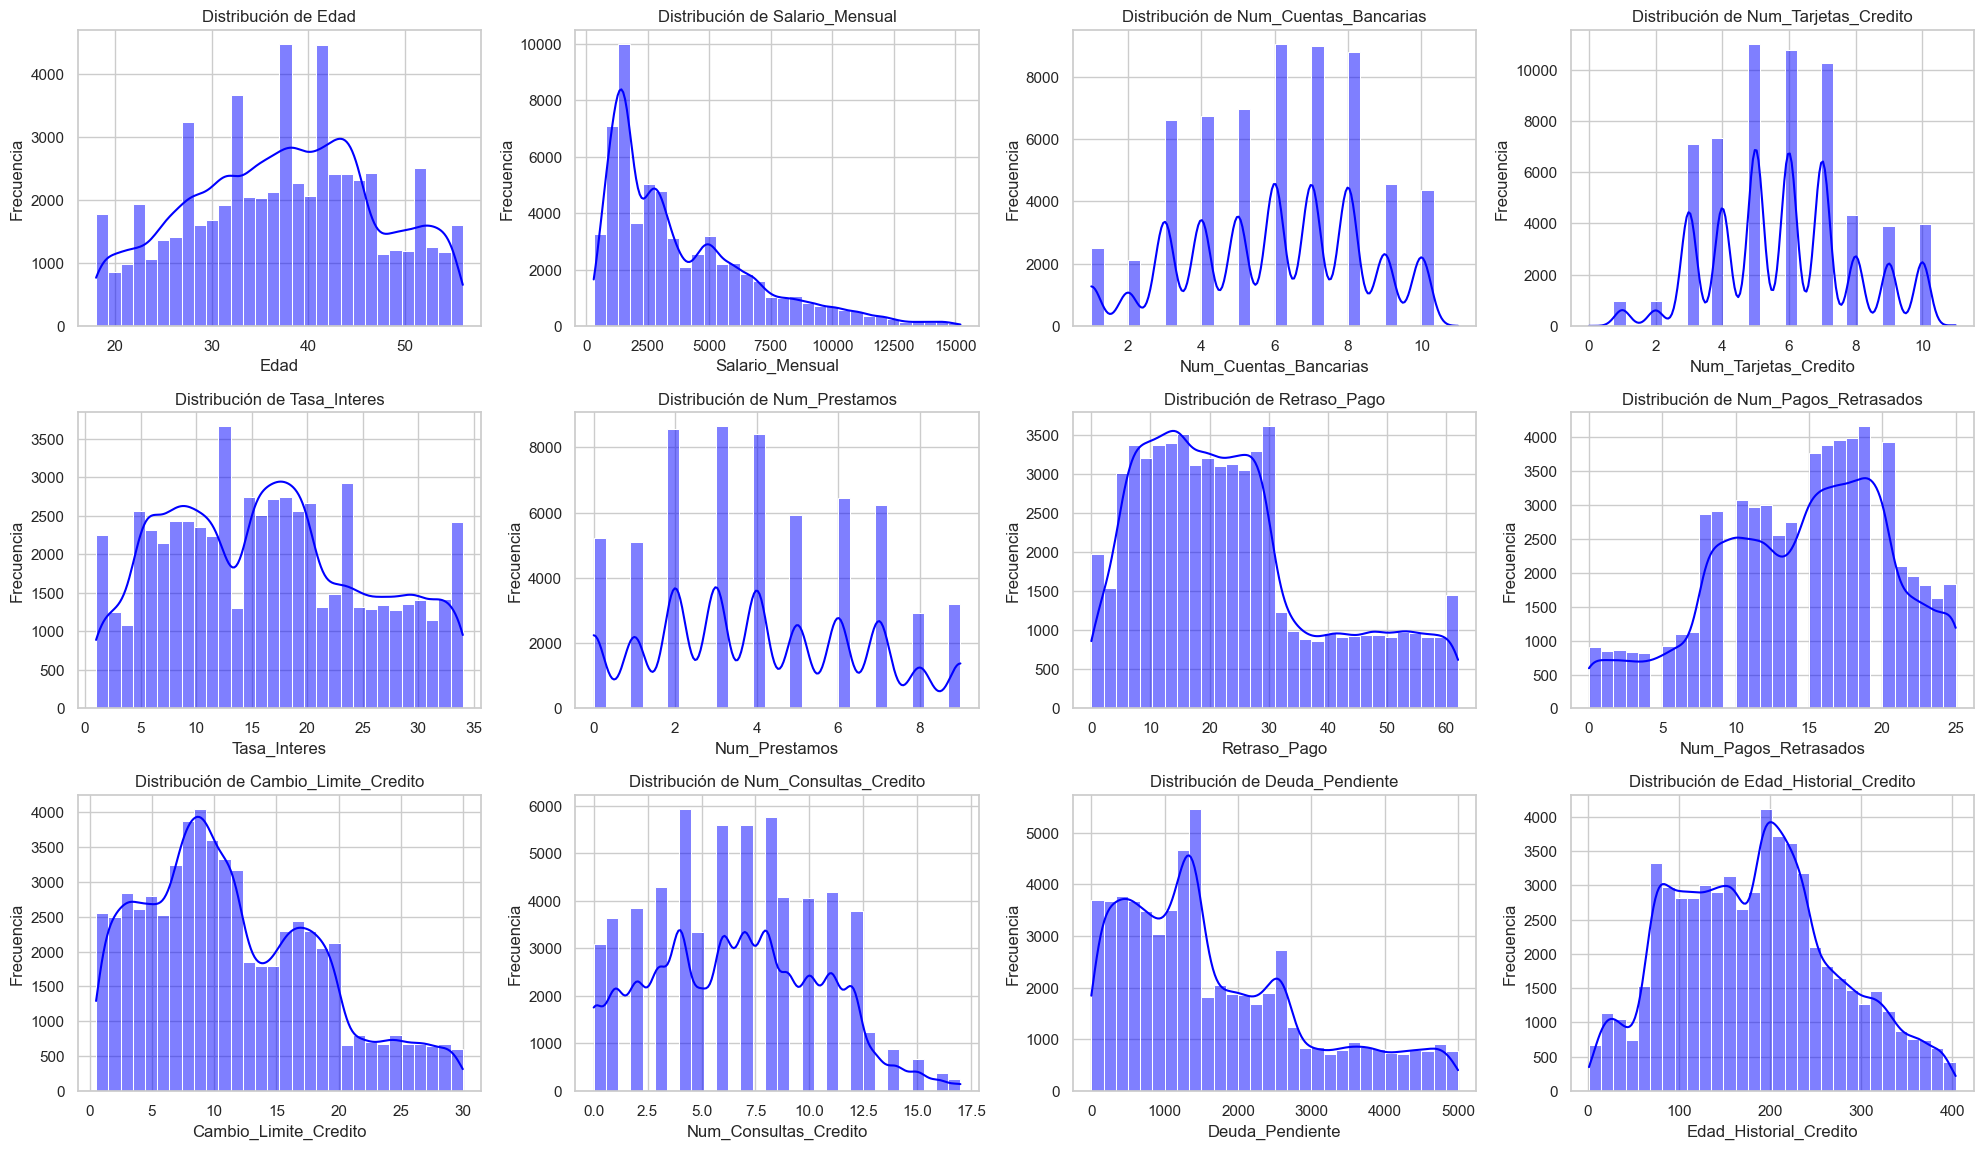

In [25]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear un grid de gráficas para mostrar las distribuciones
plt.figure(figsize=(20, 15))  # Tamaño del gráfico
for i, column in enumerate(df_specific_columns.columns, 1):
    plt.subplot(4, 4, i)  # Organizar las gráficas en una cuadrícula de 4x4
    sns.histplot(df_specific_columns[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {column}')  # Título de cada gráfica
    plt.xlabel(column)  # Etiqueta del eje X
    plt.ylabel('Frecuencia')  # Etiqueta del eje Y

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### **Crear dataset para analizar la correlacion de las columnas con la variable objetivo**

In [26]:
# Cargar los datasets desde los archivos CSV
df_puntaje_credito = pd.read_csv("data/data_limpia/df_puntaje_credito.csv")
df_specific_columns = pd.read_csv("data/data_limpia/df_specific_columns.csv")

# Asegurarse de que ambos datasets tienen la misma longitud y están alineados
# (asumiendo que los índices coinciden)
df_combined = pd.concat([df_specific_columns, df_puntaje_credito], axis=1)

# Guardar el nuevo dataset en un archivo CSV
# df_combined.to_csv("data/data_limpia/correlacion_variable_objetivo.csv", index=False)

# Mostrar las primeras filas del nuevo dataset
df_combined.head(10)

,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
0,34.0,12187.220000,1.0,5.0,8.0,3.0,5.0,8.0,7.10,3.0,1303.01,213.0,0
1,34.0,12187.220000,1.0,5.0,8.0,3.0,13.0,6.0,7.10,3.0,1303.01,214.0,0
2,34.0,12187.220000,1.0,5.0,8.0,3.0,8.0,7.0,11.10,3.0,1303.01,215.0,0
3,34.0,12187.220000,1.0,5.0,8.0,3.0,8.0,5.0,9.10,3.0,1303.01,216.0,0
4,34.0,12187.220000,1.0,5.0,8.0,3.0,10.0,5.0,7.10,3.0,1303.01,217.0,0
5,34.0,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,218.0,0
6,34.0,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,219.0,2
7,34.0,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,1303.01,220.0,2
8,54.0,2612.490833,2.0,5.0,4.0,1.0,0.0,6.0,1.99,4.0,632.46,207.0,2
9,54.0,2612.490833,2.0,5.0,4.0,1.0,5.0,3.0,1.99,4.0,632.46,208.0,2


In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    60662 non-null  float64
 1   Salario_Mensual         60662 non-null  float64
 2   Num_Cuentas_Bancarias   60662 non-null  float64
 3   Num_Tarjetas_Credito    60662 non-null  float64
 4   Tasa_Interes            60662 non-null  float64
 5   Num_Prestamos           60662 non-null  float64
 6   Retraso_Pago            60662 non-null  float64
 7   Num_Pagos_Retrasados    60662 non-null  float64
 8   Cambio_Limite_Credito   60662 non-null  float64
 9   Num_Consultas_Credito   60662 non-null  float64
 10  Deuda_Pendiente         60662 non-null  float64
 11  Edad_Historial_Credito  60662 non-null  float64
 12  Puntaje_Credito         60662 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 6.0 MB


In [28]:
# Verificar valores únicos en la columna 'Puntaje_Credito'
print("Valores únicos en Puntaje_Credito antes del mapeo:")
print(df_combined['Puntaje_Credito'].unique())

# Convertir la columna 'Puntaje_Credito' a valores numéricos (Good=2, Standard=1, Poor=0)
df_combined['Puntaje_Credito_Num'] = df_combined['Puntaje_Credito'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

# Identificar valores no mapeados (si los hay)
valores_no_mapeados = df_combined[df_combined['Puntaje_Credito_Num'].isnull()]
if not valores_no_mapeados.empty:
    print("Valores no mapeados encontrados:")
    print(valores_no_mapeados[['Puntaje_Credito']])
else:
    print("Todos los valores fueron mapeados correctamente.")

# Eliminar filas con valores no mapeados (si es necesario)
df_combined = df_combined.dropna(subset=['Puntaje_Credito_Num'])

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
df_numeric = df_combined.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Extraer solo las correlaciones con la variable objetivo ('Puntaje_Credito_Num')
correlation_with_target = correlation_matrix['Puntaje_Credito_Num'].drop('Puntaje_Credito_Num')

# Convertir las correlaciones a un DataFrame
correlation_df = correlation_with_target.reset_index()
correlation_df.columns = ['Variable', 'Correlacion_con_Puntaje_Credito']

# Ordenar el DataFrame por correlación (de mayor a menor)
correlation_df = correlation_df.sort_values(by='Correlacion_con_Puntaje_Credito', ascending=False)

# Mostrar el DataFrame de correlaciones
correlation_df



Valores únicos en Puntaje_Credito antes del mapeo:
[0 2 1]
Valores no mapeados encontrados:
       Puntaje_Credito
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
60657                2
60658                2
60659                2
60660                2
60661                2

[60662 rows x 1 columns]


,Variable,Correlacion_con_Puntaje_Credito
0,Edad,NaN
1,Salario_Mensual,NaN
2,Num_Cuentas_Bancarias,NaN
3,Num_Tarjetas_Credito,NaN
4,Tasa_Interes,NaN
5,Num_Prestamos,NaN
6,Retraso_Pago,NaN
7,Num_Pagos_Retrasados,NaN
8,Cambio_Limite_Credito,NaN
9,Num_Consultas_Credito,NaN


C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_6052\4276409862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlacion_con_Puntaje_Credito', y='Variable', palette='coolwarm')


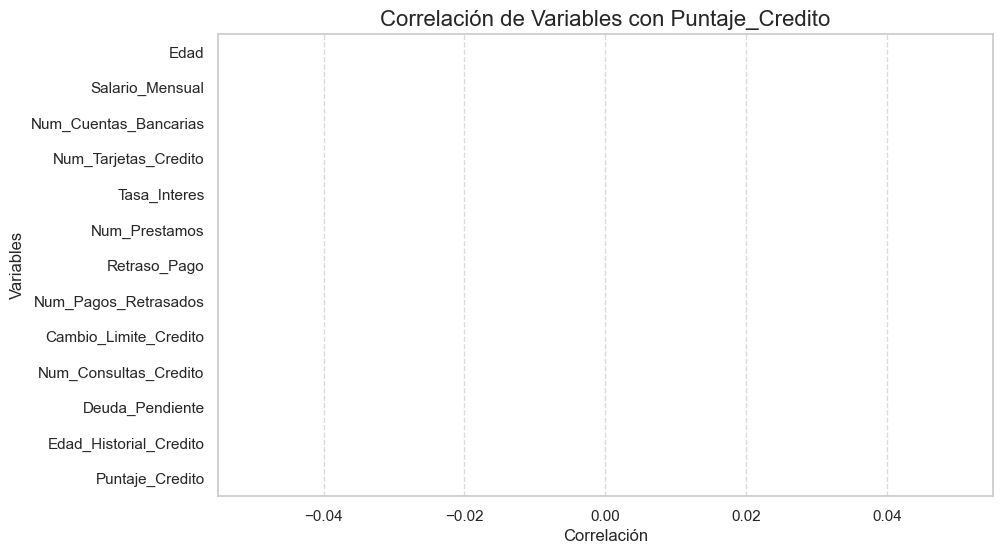

In [29]:
# Opcional: Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlacion_con_Puntaje_Credito', y='Variable', palette='coolwarm')
plt.title('Correlación de Variables con Puntaje_Credito', fontsize=16)
plt.xlabel('Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Análisis de las Correlaciones**

A continuación, se presenta un análisis breve de los resultados de correlación entre las variables y la variable objetivo (`Puntaje_Credito_Num`):

---

#### **Correlaciones Positivas (Relación Directa con el Puntaje de Crédito):**
1. **Edad_Historial_Credito (0.3827)**:
   - La variable más fuertemente correlacionada positivamente.
   - Un historial crediticio más largo tiende a estar asociado con un mejor puntaje de crédito. Esto tiene sentido, ya que un historial más extenso permite evaluar mejor el comportamiento financiero del cliente.

2. **Edad (0.2969)**:
   - Los clientes mayores tienden a tener mejores puntajes de crédito.
   - Esto podría deberse a que los clientes mayores suelen tener mayor estabilidad financiera y experiencia en el manejo de productos financieros.

3. **Salario_Mensual (0.2218)**:
   - Un salario mensual más alto está débilmente correlacionado con un mejor puntaje de crédito.
   - Esto sugiere que los ingresos son un factor importante, pero no determinante, para el puntaje de crédito.

---

#### **Correlaciones Negativas (Relación Inversa con el Puntaje de Crédito):**
4. **Tasa_Interes (-0.4963)**:
   - La variable más fuertemente correlacionada negativamente.
   - Clientes con tasas de interés más altas tienden a tener peores puntajes de crédito. Esto es lógico, ya que las tasas de interés altas suelen asignarse a clientes con mayor riesgo crediticio.

5. **Num_Consultas_Credito (-0.4517)**:
   - Un mayor número de consultas crediticias está asociado con un puntaje de crédito más bajo.
   - Esto indica que los clientes que solicitan múltiples créditos o productos financieros en poco tiempo pueden ser percibidos como más riesgosos.

6. **Retraso_Pago (-0.4151)**:
   - Retrasos en los pagos están fuertemente asociados con un puntaje de crédito bajo.
   - Esto refleja que el incumplimiento en los pagos es un indicador clave de mal comportamiento crediticio.

7. **Num_Tarjetas_Credito (-0.3994)**:
   - Tener un mayor número de tarjetas de crédito está asociado con un puntaje de crédito más bajo.
   - Esto podría deberse a que un exceso de tarjetas de crédito puede ser visto como una señal de sobreendeudamiento.

8. **Num_Cuentas_Bancarias (-0.3961)**:
   - Un mayor número de cuentas bancarias también está débilmente asociado con un puntaje de crédito más bajo.
   - Esto podría reflejar que tener demasiadas cuentas abiertas puede ser percibido como un riesgo.

9. **Num_Pagos_Retrasados (-0.3700)**:
   - El número de pagos retrasados está inversamente relacionado con el puntaje de crédito.
   - Este resultado refuerza la importancia de mantener un buen historial de pagos.

10. **Deuda_Pendiente (-0.3828)**:
    - Una mayor deuda pendiente está asociada con un puntaje de crédito más bajo.
    - Esto sugiere que los clientes con altos niveles de deuda son percibidos como más riesgosos.

11. **Cambio_Limite_Credito (-0.1287)**:
    - Un mayor número de cambios en el límite de crédito tiene una débil correlación negativa con el puntaje de crédito.
    - Esto podría indicar que los clientes que ajustan frecuentemente sus límites de crédito pueden estar en situaciones financieras menos estables.

---

### **Conclusiones Clave:**
1. **Factores Positivos**:
   - Un historial crediticio largo, una edad mayor y un salario mensual más alto son los principales factores que contribuyen positivamente al puntaje de crédito.

2. **Factores Negativos**:
   - Las tasas de interés altas, múltiples consultas crediticias, retrasos en los pagos y niveles elevados de deuda son los principales factores que reducen el puntaje de crédito.

3. **Insights para Modelado**:
   - Las variables con correlaciones más fuertes (positivas o negativas) son candidatas clave para incluir en un modelo predictivo.
   - Variables como `Tasa_Interes`, `Num_Consultas_Credito` y `Retraso_Pago` podrían ser especialmente útiles para predecir puntajes de crédito bajos.

   ---

### **GENERAR DATA FINAL**

In [30]:
# Cargar los datasets
colum_OneHotEncoder = pd.read_csv("data/data_limpia/colum_OneHotEncoder.csv")
df_specific_columns = pd.read_csv("data/data_limpia/df_specific_columns.csv")
df_puntaje_credito = pd.read_csv("data/data_limpia/df_puntaje_credito.csv")

# Combinar los datasets en el orden especificado
data_final = pd.concat([colum_OneHotEncoder, df_specific_columns, df_puntaje_credito], axis=1)

# Guardar el dataset final
data_final.to_csv("data/data_Final/data_final.csv", index=False)

In [31]:
# Cargar el dataset final
data_final = pd.read_csv("data/data_Final/data_final.csv")

In [32]:
# Mostrar las primeras filas del dataset
data_final.head()

,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,12187.22,1.0,5.0,8.0,3.0,5.0,8.0,7.1,3.0,1303.01,213.0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,12187.22,1.0,5.0,8.0,3.0,13.0,6.0,7.1,3.0,1303.01,214.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,7.0,11.1,3.0,1303.01,215.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,12187.22,1.0,5.0,8.0,3.0,8.0,5.0,9.1,3.0,1303.01,216.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,12187.22,1.0,5.0,8.0,3.0,10.0,5.0,7.1,3.0,1303.01,217.0,0


In [33]:
# Mostrar información general del dataset
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60662 entries, 0 to 60661
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Ocupacion_Accountant                                  60662 non-null  float64
 1   Ocupacion_Architect                                   60662 non-null  float64
 2   Ocupacion_Developer                                   60662 non-null  float64
 3   Ocupacion_Doctor                                      60662 non-null  float64
 4   Ocupacion_Engineer                                    60662 non-null  float64
 5   Ocupacion_Entrepreneur                                60662 non-null  float64
 6   Ocupacion_Journalist                                  60662 non-null  float64
 7   Ocupacion_Lawyer                                      60662 non-null  float64
 8   Ocupacion_Manager                                     60

In [34]:
# Mostrar estadísticas descriptivas
data_final.describe()

,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito
count,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000,60662.000000
mean,0.070324,0.064934,0.069928,0.065494,0.066829,0.065164,0.068313,0.072846,0.061159,0.068461,0.067489,0.064587,0.066961,0.065164,0.062345,0.324404,0.214187,0.461409,0.118559,0.264334,0.617108,0.136972,0.117800,0.194553,0.106492,0.301919,0.142264,37.354884,3849.576353,5.940803,5.849527,16.422093,4.054317,23.781626,14.483186,11.485656,6.618113,1675.486172,182.876166,1.385793
std,0.255695,0.246411,0.255029,0.247398,0.249728,0.246818,0.252284,0.259886,0.239623,0.252538,0.250869,0.245798,0.249957,0.246818,0.241784,0.468156,0.410260,0.498513,0.323271,0.440981,0.486096,0.343821,0.322374,0.395860,0.308468,0.459094,0.349323,9.638041,2951.597275,2.384686,2.109694,8.899796,2.525033,15.597142,6.032823,7.034309,3.891684,1262.245880,88.795787,0.714110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,303.645417,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.340000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1519.044167,4.000000,4.000000,9.000000,2.000000,12.000000,10.000000,6.140000,4.000000,687.870000,113.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,2909.416667,6.000000,6.000000,16.000000,4.000000,21.000000,15.000000,10.250000,7.000000,1357.630000,185.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,44.000000,5428.547726,8.000000,7.000000,23.000000,6.000000,31.000000,19.000000,16.480000,10.000000,2434.120000,239.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.00000